In [1]:
import os

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

import time
from catboost import CatBoostClassifier, CatBoostRegressor, Pool, cv
import pickle
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import shap

In [2]:
os.getcwd()

'/Users/marcin/Documents/VIMSS/COVID/ecointeractions'

In [3]:
shap.initjs()

In [4]:
random_seed = 123

print("start")

dataframe_list_list = np.empty((10, 5)).tolist()


start


In [5]:
df_eco = pd.read_csv('./Datasets/Marginal_Combined_60.csv', sep=',', index_col=0, encoding='utf-8')
print(df_eco.head())

    FIPS  unclassified_indoor_fungi  \
1  35001                       3445   
2  35001                       3081   
3  35001                       5112   
4  35001                       2513   
5  35001                       3523   

   k__Fungi.p__Ascomycota.c__Eurotiomycetes.o__Eurotiales.f__Trichocomaceae.g__Aspergillus_indoor  \
1                                                 17                                                
2                                                 36                                                
3                                                380                                                
4                                                 14                                                
5                                                 18                                                

   k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Capnodiales.f__Incertae.sedis.g__Toxicocladosporium_indoor  \
1                                               

In [6]:
for i in range(0, 10):
    for j in range(0, 5):
        dataframe_list_list[i][j] = pd.read_csv('./CV_Sets/Marginal_Combined_60/Set_'+str(i+1)+'/Fold_'+str(j+1)+'.csv', sep=',', index_col=0, encoding='utf-8')
        #print(df_cur.head())
        

In [9]:
type(dataframe_list_list[0][0].columns.values)

numpy.ndarray

In [21]:
dataframe_list_list[1][1]['Set_Type'].head()

35    Training
36    Training
94    Training
95    Training
96    Training
Name: Set_Type, dtype: object

In [22]:
dataframe_list_list[1][1][dataframe_list_list[1][1]['Set_Type'] == 'Training'].head()

,FIPS,unclassified_indoor_fungi,k__Fungi.p__Ascomycota.c__Eurotiomycetes.o__Eurotiales.f__Trichocomaceae.g__Aspergillus_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Capnodiales.f__Incertae.sedis.g__Toxicocladosporium_indoor,k__Fungi.p__Ascomycota.c__unidentified.o__unidentified.f__unidentified.g__unidentified_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Incertae.sedis.g__Phoma_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Pleosporaceae.g__Alternaria_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Dothideales.f__Dothioraceae.g__Aureobasidium_indoor,k__Fungi.p__Basidiomycota.c__Microbotryomycetes.o__Sporidiobolales.f__Incertae.sedis.g__Sporobolomyces_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__unidentified.g__unidentified_indoor,...,SELECTED_MONTHLY_OWNER_COSTS_Housing_units_with_a_mortgage_Less_than_500_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_units_with_a_mortgage_30_to_34point9_percent_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_units_with_a_mortgage_35_percent_or_more_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_unit_without_a_mortgage_Less_than_10_percent_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_unit_without_a_mortgage_30_to_34point9_percent_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_unit_without_a_mortgage_35_percent_or_more_shuffled,gathering_size_10_0_shuffled,Chance_Wearing_Mask_shuffled,IFR,Set_Type
35,54039,1695,2092,133,8,49,140,7,16,251,...,0.044054,0.076124,0.203598,0.548830,0.027679,0.065365,0.237705,0.9249,0.005299,Training
36,54039,3279,330,65,77,306,326,95,15,116,...,0.018341,0.059677,0.211957,0.415808,0.020724,0.054062,0.266393,0.8825,0.005299,Training
94,34025,2263,68,482,274,77,406,150,117,50,...,0.005073,0.068832,0.235507,0.538508,0.017508,0.077983,0.000000,0.8167,0.006344,Training
95,34025,1510,93,5,8,1523,183,138,7,15,...,0.018341,0.072110,0.181295,0.569735,0.026566,0.100114,0.401639,0.8167,0.006344,Training
96,34025,2780,109,53,120,430,319,157,19,133,...,0.010349,0.064510,0.195989,0.238344,0.028104,0.047939,0.000000,0.9058,0.006344,Training


In [12]:
dataframe_list_list_orig = dataframe_list_list

In [53]:
dataframe_list_list_orig[1][1].head()

,FIPS,unclassified_indoor_fungi,k__Fungi.p__Ascomycota.c__Eurotiomycetes.o__Eurotiales.f__Trichocomaceae.g__Aspergillus_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Capnodiales.f__Incertae.sedis.g__Toxicocladosporium_indoor,k__Fungi.p__Ascomycota.c__unidentified.o__unidentified.f__unidentified.g__unidentified_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Incertae.sedis.g__Phoma_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Pleosporaceae.g__Alternaria_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Dothideales.f__Dothioraceae.g__Aureobasidium_indoor,k__Fungi.p__Basidiomycota.c__Microbotryomycetes.o__Sporidiobolales.f__Incertae.sedis.g__Sporobolomyces_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__unidentified.g__unidentified_indoor,...,SELECTED_MONTHLY_OWNER_COSTS_Housing_units_with_a_mortgage_Less_than_500_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_units_with_a_mortgage_30_to_34point9_percent_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_units_with_a_mortgage_35_percent_or_more_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_unit_without_a_mortgage_Less_than_10_percent_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_unit_without_a_mortgage_30_to_34point9_percent_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_unit_without_a_mortgage_35_percent_or_more_shuffled,gathering_size_10_0_shuffled,Chance_Wearing_Mask_shuffled,IFR,Set_Type
35,54039,1695,2092,133,8,49,140,7,16,251,...,0.044054,0.076124,0.203598,0.548830,0.027679,0.065365,0.237705,0.9249,0.005299,Training
36,54039,3279,330,65,77,306,326,95,15,116,...,0.018341,0.059677,0.211957,0.415808,0.020724,0.054062,0.266393,0.8825,0.005299,Training
94,34025,2263,68,482,274,77,406,150,117,50,...,0.005073,0.068832,0.235507,0.538508,0.017508,0.077983,0.000000,0.8167,0.006344,Training
95,34025,1510,93,5,8,1523,183,138,7,15,...,0.018341,0.072110,0.181295,0.569735,0.026566,0.100114,0.401639,0.8167,0.006344,Training
96,34025,2780,109,53,120,430,319,157,19,133,...,0.010349,0.064510,0.195989,0.238344,0.028104,0.047939,0.000000,0.9058,0.006344,Training


In [13]:
dataframe_list_list = dataframe_list_list_orig
train_X_list_list =  np.empty((10, 5)).tolist()
test_X_list_list =  np.empty((10, 5)).tolist()
train_y_list_list =  np.empty((10, 5)).tolist()
test_y_list_list =  np.empty((10, 5)).tolist()

for i in range(0, 10):
    for j in range(0, 5):
        print(str(i)+"\t"+str(j))

        df_cur = dataframe_list_list[i][j] 
        #df_cur = df_cur.drop(['FIPS'], axis=1)
        #df_cur = df_cur.drop(['Set_Type'], axis=1)
        y = df_cur['IFR']
        #print(y)

        print("df_cur "+str(df_cur.shape))

        #X = df_cur#.iloc[:,:-1]
        #X.drop(['FIPS'], axis=1, inplace=True)
        #print(X.columns)
        #print("X "+str(X.shape))
        X_train = df_cur[dataframe_list_list[i][j]['Set_Type'] == 'Training'] 
        X_test = df_cur[dataframe_list_list[i][j]['Set_Type'] == 'Test']
        y_train = df_cur[dataframe_list_list[i][j]['Set_Type'] == 'Training']['IFR']
        y_test = df_cur[dataframe_list_list[i][j]['Set_Type'] == 'Test']['IFR']
        print("shapes "+str(X_train.shape)+"\t"+str(X_test.shape)+"\t"+str(y_train.shape)+"\t"+str(y_test.shape))
        
        #print(y_train)
        X_train.drop(['Set_Type'], axis=1, inplace=True)
        X_train.drop(['FIPS'], axis=1, inplace=True)
        X_train.drop(['IFR'], axis=1, inplace=True)
        X_test.drop(['Set_Type'], axis=1, inplace=True)
        X_test.drop(['FIPS'], axis=1, inplace=True)
        X_test.drop(['IFR'], axis=1, inplace=True)

        print("train label deficit:",len(set(y)-set(y_train)),"test label deficit:",len(set(y)-set(y_test)))

        print("shapes "+str(X_train.shape)+"\t"+str(X_test.shape)+"\t"+str(y_train.shape)+"\t"+str(y_test.shape))

        #train_dataset = Pool(X_train, y_train)
        #test_dataset = Pool(X_test, y_test)
        train_X_list_list[i][j] = X_train
        test_X_list_list[i][j] = X_test
        train_y_list_list[i][j] = y_train
        test_y_list_list[i][j] = y_test

0	0
df_cur (989, 429)
shapes (792, 429)	(197, 429)	(792,)	(197,)
train label deficit: 96 test label deficit: 356
shapes (792, 426)	(197, 426)	(792,)	(197,)
0	1
df_cur (989, 429)
shapes (732, 429)	(257, 429)	(732,)	(257,)
train label deficit: 104 test label deficit: 348
shapes (732, 426)	(257, 426)	(732,)	(257,)
0	2
df_cur (989, 429)
shapes (795, 429)	(194, 429)	(795,)	(194,)
train label deficit: 89 test label deficit: 364
shapes (795, 426)	(194, 426)	(795,)	(194,)
0	3
df_cur (989, 429)
shapes (832, 429)	(157, 429)	(832,)	(157,)
train label deficit: 77 test label deficit: 375
shapes (832, 426)	(157, 426)	(832,)	(157,)
0	4
df_cur (989, 429)
shapes (805, 429)	(184, 429)	(805,)	(184,)
train label deficit: 86 test label deficit: 367
shapes (805, 426)	(184, 426)	(805,)	(184,)
1	0
df_cur (989, 429)
shapes (799, 429)	(190, 429)	(799,)	(190,)
train label deficit: 87 test label deficit: 366
shapes (799, 426)	(190, 426)	(799,)	(190,)
1	1
df_cur (989, 429)
shapes (785, 429)	(204, 429)	(785,)	(204,


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


shapes (800, 429)	(189, 429)	(800,)	(189,)
train label deficit: 94 test label deficit: 358
shapes (800, 426)	(189, 426)	(800,)	(189,)
3	1
df_cur (989, 429)
shapes (792, 429)	(197, 429)	(792,)	(197,)
train label deficit: 92 test label deficit: 360
shapes (792, 426)	(197, 426)	(792,)	(197,)
3	2
df_cur (989, 429)
shapes (773, 429)	(216, 429)	(773,)	(216,)
train label deficit: 97 test label deficit: 355
shapes (773, 426)	(216, 426)	(773,)	(216,)
3	3
df_cur (989, 429)
shapes (805, 429)	(184, 429)	(805,)	(184,)
train label deficit: 79 test label deficit: 374
shapes (805, 426)	(184, 426)	(805,)	(184,)
3	4
df_cur (989, 429)
shapes (786, 429)	(203, 429)	(786,)	(203,)
train label deficit: 90 test label deficit: 362
shapes (786, 426)	(203, 426)	(786,)	(203,)
4	0
df_cur (989, 429)
shapes (768, 429)	(221, 429)	(768,)	(221,)
train label deficit: 98 test label deficit: 355
shapes (768, 426)	(221, 426)	(768,)	(221,)
4	1
df_cur (989, 429)
shapes (789, 429)	(200, 429)	(789,)	(200,)
train label deficit: 

In [14]:
train_X_list_list[i][j].head()

,unclassified_indoor_fungi,k__Fungi.p__Ascomycota.c__Eurotiomycetes.o__Eurotiales.f__Trichocomaceae.g__Aspergillus_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Capnodiales.f__Incertae.sedis.g__Toxicocladosporium_indoor,k__Fungi.p__Ascomycota.c__unidentified.o__unidentified.f__unidentified.g__unidentified_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Incertae.sedis.g__Phoma_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Pleosporaceae.g__Alternaria_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Dothideales.f__Dothioraceae.g__Aureobasidium_indoor,k__Fungi.p__Basidiomycota.c__Microbotryomycetes.o__Sporidiobolales.f__Incertae.sedis.g__Sporobolomyces_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__unidentified.g__unidentified_indoor,k__Fungi.p__Basidiomycota.c__Tremellomycetes.o__Filobasidiales.f__Filobasidiaceae.g__Cryptococcus_indoor,...,SELECTED_CHARACTERISTICS_Occupied_housing_units_Lacking_complete_plumbing_facilities_shuffled,GROSS_RENT_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Occupied_units_paying_rent_Less_than_15_percent_shuffled,SELECTED_MONTHLY_OWNER_COSTS_Housing_units_with_a_mortgage_Less_than_500_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_units_with_a_mortgage_30_to_34point9_percent_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_units_with_a_mortgage_35_percent_or_more_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_unit_without_a_mortgage_Less_than_10_percent_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_unit_without_a_mortgage_30_to_34point9_percent_shuffled,SELECTED_MONTHLY_OWNER_COSTS_AS_A_PERCENTAGE_OF_HOUSEHOLD_INCOME_Housing_unit_without_a_mortgage_35_percent_or_more_shuffled,gathering_size_10_0_shuffled,Chance_Wearing_Mask_shuffled
35,1695,2092,133,8,49,140,7,16,251,4,...,0.004267,0.043687,0.044054,0.076124,0.203598,0.548830,0.027679,0.065365,0.237705,0.9249
36,3279,330,65,77,306,326,95,15,116,28,...,0.001603,0.043085,0.018341,0.059677,0.211957,0.415808,0.020724,0.054062,0.266393,0.8825
94,2263,68,482,274,77,406,150,117,50,59,...,0.001029,0.051317,0.005073,0.068832,0.235507,0.538508,0.017508,0.077983,0.000000,0.8167
95,1510,93,5,8,1523,183,138,7,15,15,...,0.003597,0.044839,0.018341,0.072110,0.181295,0.569735,0.026566,0.100114,0.401639,0.8167
96,2780,109,53,120,430,319,157,19,133,28,...,0.001732,0.031323,0.010349,0.064510,0.195989,0.238344,0.028104,0.047939,0.000000,0.9058


In [27]:
modelstart = time.time()

train_dataset = Pool(train_X_list_list[i][j], train_y_list_list[i][j])

print(f"Starting search at {modelstart}")
cb_model = CatBoostRegressor(loss_function='MAE',
                             iterations = 1000,
                             verbose = 5,
                             learning_rate = 0.1,
                             depth = 3,
                             l2_leaf_reg = 0.5,
                             eval_metric = 'R2',
                             random_seed = random_seed,
                             bagging_temperature = 0.2,
                             od_type = 'Iter',
                             od_wait = 100
)

grid = {#'iterations': [100, 150, 200],
       'learning_rate': [0.1],#[0.01, 0.1, 0.2],
        'depth': [4],#[3, 4, 5],
        'l2_leaf_reg': [2],#[1, 2, 2.5],
        'random_strength': [0, 0.1, 0.5],
        'bagging_temperature': [0.0000000001, 0.000000001, 0.00000001]}
grid_search_result = cb_model.grid_search(grid, train_dataset)

lr = grid_search_result['params']['learning_rate']
de = grid_search_result['params']['depth']
l2 = grid_search_result['params']['l2_leaf_reg']
rs = grid_search_result['params']['random_strength']
bg = grid_search_result['params']['bagging_temperature']
print(f"Trained grid search in {time.time() - modelstart}s")
print("lr "+str(lr)+", de "+str(de)+", l2 "+str(l2)+", rs "+str(rs)+", bg "+str(bg))

Starting search at 1615837527.692536
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6617190618
bestIteration = 403

0:	loss: 0.6617191	best: 0.6617191 (0)	total: 3.65s	remaining: 29.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6330538717
bestIteration = 410

1:	loss: 0.6330539	best: 0.6617191 (0)	total: 7.28s	remaining: 25.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6370458006
bestIteration = 626

2:	loss: 0.6370458	best: 0.6617191 (0)	total: 13.2s	remaining: 26.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6617190618
bestIteration = 403

3:	loss: 0.6617191	best: 0.6617191 (0)	total: 17.7s	remaining: 22.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6330538717
bestIteration = 410

4:	loss: 0.6330539	best: 0.6617191 (0)	total: 21.9s	remaining: 17.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6370458006
bestIteration = 626

5:	loss: 0.6

In [28]:
#lr = 0.08
#de = 4
#l2 = 10
#bg = 100
models_list =  np.empty((10, 5)).tolist()
sorted_feature_importance_list =  np.empty((10, 5)).tolist()
R2_list =  np.empty((10, 0)).tolist()
for i in range(0, 10):
    for j in range(0, 5):
        print(str(i)+"\t"+str(j))
        cb_model = CatBoostRegressor(loss_function='MAE',
                             iterations = 1000,
                             verbose = 0,
                             learning_rate = lr,
                             depth = de,
                             l2_leaf_reg = l2,
                             random_strength = rs,
                             eval_metric = 'R2',
                             random_seed = random_seed,
                             bagging_temperature = bg,
                             od_type = 'Iter',
                             od_wait = 100
        )
        modelstart = time.time()
        print(f"Starting search at {modelstart}")
        #print(type(train_y_list_list[i][j]))
        #print(train_y_list_list[i][j])
        cbmf = cb_model.fit(train_X_list_list[i][j],train_y_list_list[i][j])
        print(f"Trained in {time.time() - modelstart}s")
        
        pred_train = cb_model.predict(train_X_list_list[i][j])
        r2T = r2_score(train_y_list_list[i][j], pred_train)
        print("Testing performance:")
        print('R2 training: {:.2f}'.format(r2T))

        pred_test = cb_model.predict(test_X_list_list[i][j])
        r2 = r2_score(test_y_list_list[i][j], pred_test)
        print("Testing performance:")
        print('R2: {:.2f}'.format(r2))
        
        #cbmf.feature_names = dataframe_list_list[i][j].columns.drop(['Set_Type','FIPS','IFR'])
        models_list[i][j] = cb_model
        sorted_feature_importance_list[i][j] = cb_model.feature_importances_.argsort()
        
        R2_list[i].append(r2)


0	0
Starting search at 1615837686.154052
Trained in 8.318689107894897s
Testing performance:
R2 training: 0.93
Testing performance:
R2: 0.27
0	1
Starting search at 1615837694.4959161
Trained in 8.554074764251709s
Testing performance:
R2 training: 0.93
Testing performance:
R2: 0.46
0	2
Starting search at 1615837703.073913
Trained in 8.054603099822998s
Testing performance:
R2 training: 0.93
Testing performance:
R2: 0.46
0	3
Starting search at 1615837711.1549592
Trained in 8.561582803726196s
Testing performance:
R2 training: 0.94
Testing performance:
R2: 0.42
0	4
Starting search at 1615837719.741945
Trained in 9.202305793762207s
Testing performance:
R2 training: 0.91
Testing performance:
R2: 0.45
1	0
Starting search at 1615837728.972095
Trained in 9.350024938583374s
Testing performance:
R2 training: 0.92
Testing performance:
R2: 0.48
1	1
Starting search at 1615837738.3512251
Trained in 8.34656572341919s
Testing performance:
R2 training: 0.93
Testing performance:
R2: 0.36
1	2
Starting searc

In [29]:
R2_list_orig = R2_list
df = pd.DataFrame(R2_list, columns = ['1', '2', '3', '4', '5'])

In [30]:
df.mean().mean()


0.42006180695535134

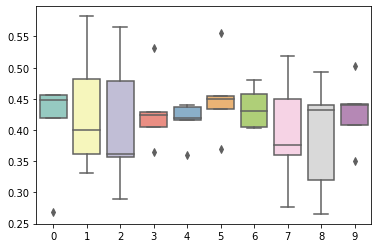

In [31]:
ax = sns.boxplot( data=df.transpose(), palette="Set3")

In [32]:
sorted_feature_importance_list[1][2] 

array([121, 143, 155, 106, 135, 147, 115,  98, 342,  47, 130,  92,  69,
        70, 140,  86,   8, 127, 133, 157, 290, 114, 153, 295, 399, 146,
       326,  53, 367,  62,  93,  24, 306, 105, 111,  79, 154, 394, 278,
       393, 131, 366, 353, 305, 144,  82, 118, 162, 142, 260, 321, 325,
        42,  54, 408,  84, 286,  23,  32,  65,  96, 336,  37, 371, 241,
         3,  17, 178, 343, 364, 148, 132, 375, 298,  45, 368, 221,  91,
       361, 275,  29,  31, 328, 355, 374, 215,  94, 123, 122, 376, 254,
       324, 363, 103, 319, 358,  49, 104,  87,  77, 145, 109, 270, 152,
       167,  97,  55, 158, 156,  63, 346,  20,  41, 349,  64,  16,  74,
       137, 119, 413, 266, 310, 141, 345, 304,  43, 421, 284, 276, 338,
        67,  50,  38, 150, 112, 138, 160,  73, 243, 233, 161, 225, 239,
        40, 291, 318, 425,  99, 256, 110, 279, 232, 126,  60, 327, 331,
        21, 392, 323,  39, 397, 372,  22, 420, 250,  95, 107, 347, 386,
        75, 404,   0, 308, 273,  56, 282, 424,  61, 378,  19, 34

In [141]:
labels = df_eco.columns.values
index = np.argwhere(labels=='FIPS')
labels = np.delete(labels, index)
index = np.argwhere(labels=='IFR')
labels = np.delete(labels, index)
labels = labels.tolist()
print(len(labels))
labels

426


['unclassified_indoor_fungi',
 'k__Fungi.p__Ascomycota.c__Eurotiomycetes.o__Eurotiales.f__Trichocomaceae.g__Aspergillus_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Capnodiales.f__Incertae.sedis.g__Toxicocladosporium_indoor',
 'k__Fungi.p__Ascomycota.c__unidentified.o__unidentified.f__unidentified.g__unidentified_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Incertae.sedis.g__Phoma_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Pleosporaceae.g__Alternaria_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Dothideales.f__Dothioraceae.g__Aureobasidium_indoor',
 'k__Fungi.p__Basidiomycota.c__Microbotryomycetes.o__Sporidiobolales.f__Incertae.sedis.g__Sporobolomyces_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__unidentified.g__unidentified_indoor',
 'k__Fungi.p__Basidiomycota.c__Tremellomycetes.o__Filobasidiales.f__Filobasidiaceae.g__Cryptococcus_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.

In [165]:
def rank(*lists):
    d = dict()
    counts = dict()
    for i in range(0, 10):
        for j in range(0, 5):
            count = 1
            #for e in sorted_feature_importance_list[i][j]:
            for k in range(0, len(sorted_feature_importance_list[i][j])):
                e = sorted_feature_importance_list[i][j][k]
                if e in d: 
                    d[e] += k
                    counts[e] += 1
                else: 
                    if(type(e) is str):
                        print("key "+str(e))
                    d[e] = k
                    counts[e] = 1
                count = count + 1
    #print(d)
    
    for key in d:
        d[key] = d[key] / counts[key]
    
    for key in d:
        if(type(key) is str):
            print("key "+str(key))
            print(d[key])
    #for key in labels:    
    #     if(type(key) is str):
    #        print("key "+str(key))
     
    missing = 0
    final_d = dict()
    for key in d:
        if(type(key) is str):
            #print("key "+str(key))
            #print(d[key])
            missing += 1
        else:
            #print("key "+str(key))
            #print("d[key] "+str(d[key]))        
            #print("key and len "+str(key)+"\t"+str(len(labels)))
            #print("label "+labels[key])        
            final_d[labels[key]] = d[key]            
            #del d[key]
    print(missing)    
    #remove items by key condition
    #d = {key:val for key, val in d.items() if type(key) != str}            
        
    return final_d


ranks = rank(sorted_feature_importance_list)
#ranks
#labels[ranks]

0


In [166]:
ranks.values()

dict_values([184.88, 106.28, 121.74, 168.64, 196.92, 103.5, 142.28, 119.64, 121.98, 155.02, 175.16, 188.72, 104.3, 170.04, 153.14, 236.2, 123.86, 196.92, 173.08, 100.38, 64.34, 122.32, 93.58, 170.9, 100.3, 259.58, 115.2, 184.14, 107.42, 204.12, 106.78, 103.76, 171.48, 181.26, 118.78, 136.94, 168.94, 136.78, 117.94, 123.28, 92.66, 137.14, 224.86, 85.56, 182.96, 190.08, 151.3, 94.66, 130.94, 145.58, 185.06, 127.36, 170.96, 174.78, 181.32, 132.2, 99.78, 117.56, 182.64, 170.4, 153.58, 107.38, 113.42, 270.32, 195.2, 239.8, 93.14, 85.78, 189.2, 207.7, 116.96, 166.84, 94.66, 202.36, 163.36, 58.92, 115.46, 128.58, 136.38, 203.18, 126.72, 141.64, 221.12, 250.9, 126.44, 237.96, 200.76, 162.68, 225.42, 178.98, 198.6, 116.64, 105.66, 125.0, 215.5, 188.92, 134.0, 165.6, 145.3, 210.22, 122.1, 190.06, 60.42, 188.92, 185.32, 181.52, 181.14, 159.14, 210.34, 156.04, 250.38, 157.2, 208.16, 180.4, 134.34, 130.9, 142.14, 207.68, 213.24, 136.88, 294.38, 153.68, 176.8, 77.82, 184.88, 216.08, 205.56, 137.36, 

In [167]:
{k: v for k,v in sorted(ranks.items(), key=itemgetter(1))}

{'k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Actinomycetales.f__Nocardioidaceae.g__Aeromicrobium_outdoor': 58.92,
 'k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Hyphomicrobiaceae.g__Devosia_outdoor': 60.42,
 'k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Actinomycetales.f__Geodermatophilaceae.g__Geodermatophilus_outdoor': 64.34,
 'k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Actinomycetales.f__Geodermatophilaceae.g__Modestobacter_outdoor': 77.82,
 'k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Actinomycetales.f__Intrasporangiaceae.g__Phycicoccus_outdoor': 85.56,
 'k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Actinomycetales.f__Brevibacteriaceae.g__Brevibacterium_outdoor': 85.78,
 'k__Fungi.p__Basidiomycota.c__Microbotryomycetes.o__Sporidiobolales.f__Incertae.sedis.g__Rhodotorula_outdoor': 90.0,
 'k__Bacteria.p__Bacteroidetes.c__Cytophagia.o__Cytophagales.f__Cytophagaceae.g__Adhaeribacter_outdoor': 92.66,
 'k__Bacteria.p__Proteobac

In [172]:
ranks_df = pd.DataFrame(ranks.items(), columns=['taxa', 'rank'])

In [173]:
ranks_df

,taxa,rank
0,k__Bacteria.p__Proteobacteria.c__Gammaproteoba...,184.88
1,k__Bacteria.p__Actinobacteria.c__Actinobacteri...,106.28
2,k__Bacteria.p__Proteobacteria.c__Alphaproteoba...,121.74
3,k__Bacteria.p__Actinobacteria.c__Actinobacteri...,168.64
4,k__Bacteria.p__Actinobacteria.c__Actinobacteri...,196.92
...,...,...
421,gathering_size_10_0,411.60
422,MODCF_monthlymean_10,416.26
423,YEAR_HOUSEHOLDER_MOVED_INTO_UNIT_Occupied_hous...,422.70
424,HOUSE_HEATING_FUEL_Occupied_housing_units_Fuel...,421.10


In [191]:
ranks_df.sort_values(by='rank', ascending=True)[-50:].to_csv("top50_features_ranks.tsv", sep="\t")

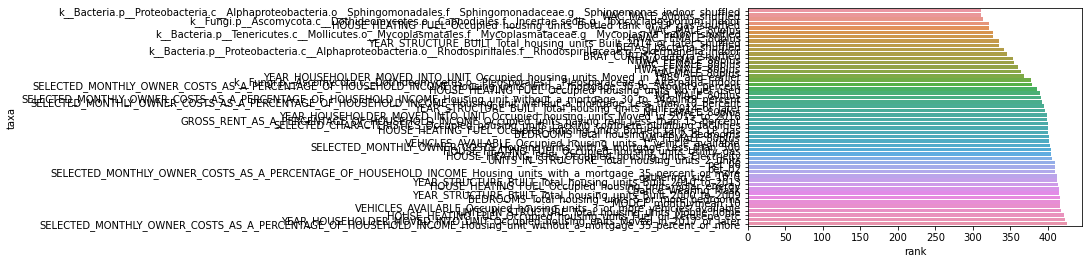

In [185]:
sns.barplot(data=ranks_df.sort_values(by='rank', ascending=True)[-50:], x='rank', y='taxa')

In [192]:
sorted_feature_importance_list[i][j]

array([ 98, 112, 114, 115,  91, 134, 146,  17,  11,  22, 142, 368,   9,
       243,  50, 135, 414, 276,  28, 130, 256, 110, 302,  38, 304, 226,
       140, 148, 139, 230, 237, 126,  69,  29, 393, 315, 394, 131, 386,
       147, 106, 127, 156, 328,  75,  76,  78, 407,  54, 164, 145, 312,
       325, 327, 118,  82, 157, 317, 330, 263, 334, 103,  45,  42, 151,
        37, 180,  77, 265, 129, 389,  64,  95,  25, 109,  73, 356, 258,
        35, 121, 220, 354, 105, 351,  99, 396, 163, 420, 108, 286, 120,
       376, 300, 303, 144, 353, 235, 128,   4, 310,  10, 277,  89,  56,
       150, 278, 155, 331, 158,  34,  79, 297, 306, 215, 341, 418, 357,
       339, 166, 336,  60,   1, 364, 391, 100, 161, 272, 136, 122, 375,
       270, 305, 296, 160, 225, 384, 241, 423, 224, 342,  96,  92, 143,
        72,  32, 236, 271, 221, 238,  55, 345, 119, 107, 399, 385, 377,
       405, 137, 240,  70, 232, 227, 367, 408, 387,  12, 343, 133, 340,
       117, 298, 335, 388, 254, 398, 153, 324, 123, 395, 273, 23